In [31]:
%matplotlib inline

import numpy as np
import cv2 as cv
import supervision as sv

In [32]:
img_1 = cv.imread('../../material/parte2/img1_tp.png', cv.IMREAD_GRAYSCALE)

In [33]:
img_2 = cv.imread('../../material/parte2/img2_tp.png', cv.IMREAD_GRAYSCALE)

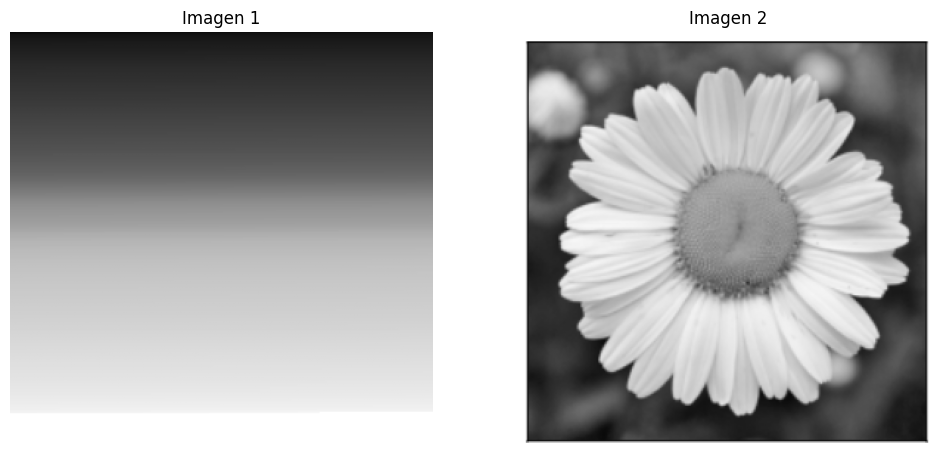

In [34]:
# Visualización con Supervision
_ = sv.plot_images_grid(
    images=[img_1, img_2],
    titles=["Imagen 1", "Imagen 2"],
    grid_size=(1, 2)
)

In [35]:
def plot_histogram(image, bins=256, title="Histograma"):
    import matplotlib.pyplot as plt
    import numpy as np

    hist, bin_edges = np.histogram(image.ravel(), bins=bins, range=(0, 256))

    plt.figure(figsize=(6, 4))
    plt.plot(hist)
    plt.title(title)
    plt.xlabel("Intensidad de píxel")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

Elegimos 64 bins para tener un histograma con cierta simplificación, pero bastante informativo:

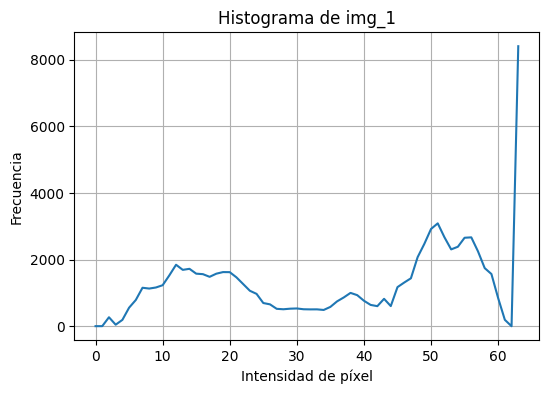

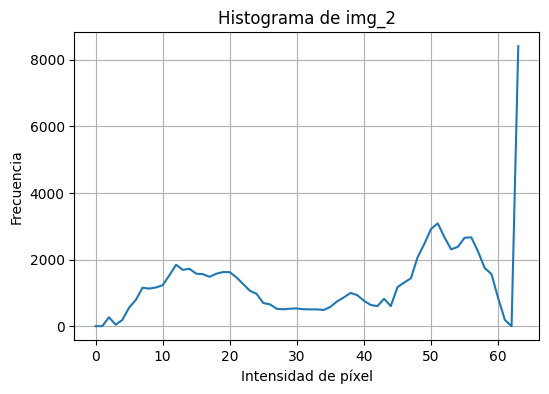

In [36]:
plot_histogram(img_1, bins=64, title="Histograma de img_1")
plot_histogram(img_2, bins=64, title="Histograma de img_2")

La impresión visual es que los histogramas son idénticos. Vamos a confirmar que esto ocurre para todos los valores de intensidad y que no es casualidad por la cantidad de bins elegidos.

In [37]:
hist_1_full, _ = np.histogram(img_1.ravel(), bins=256, range=(0, 256))
hist_2_full, _ = np.histogram(img_2.ravel(), bins=256, range=(0, 256))
np.array_equal(hist_1_full, hist_2_full)

True

Efectivamente, los histogramas son iguales para ambas fotos, a pesar de tratarse de imágenes completamente distintas. En un caso tenemos una flor de tonalidad muy clara, y, por otro lado, tenemos un degradado lineal vertical, de negro a blanco. Esto nos hace pensar que no es de utilidad tomar como "features" los histogramas, a la hora de entrenar un modelo de clasificación/detección, si lo que se requiere en dichos modelos es detectar objetos/formas/rostros. Esto ocurre porque los histogramas destruyen la información espacial.

Podría servir el histograma como feature, en todo caso, para modelos que intenten detectar/clasificar tipos de iluminación o ambientes característicos por su claridad, aunque deberían acompañarse de otras features que identifiquen la falta de dichos conceptos, como en la imagen número 1.